In [3]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
%matplotlib inline

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('법정동_데이터셋.csv',encoding ='UTF-8')
df = pd.DataFrame(data)
df1 = df.iloc[:,2:]
df1

,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도
0,10407,8604,7,534244,443947,239119,886,1018,997202,597665.000000
1,16079,14672,9,109486,90610,22056,391,102,230847,119553.777800
2,6181,6680,7,52783,45757,5595,50,4,111401,59319.714290
3,9901,12841,10,39214,32618,1133,28,7,94574,42475.800000
4,32633,35952,25,181248,168749,10920,218,32,418582,187997.960000
...,...,...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0,0,0.000000
173,0,0,0,0,0,0,0,0,0,0.000000
174,24,138,8,898,612,3,1,0,1672,974.500000
175,45,225,11,2525,1997,5,1,0,4792,2706.545455


In [43]:
df1.columns

Index(['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차', 'BUS_환승',
       '고령인구 발생량', '고령인구 도착량', '교통유동량', '버스혼잡도'],
      dtype='object')

In [45]:
features = ['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차', 'BUS_환승','고령인구 발생량', '고령인구 도착량','교통유동량', '버스혼잡도']
x = df.loc[:, features].values

In [24]:
# from sklearn.preprocessing import StandardScaler
# x_1 = StandardScaler().fit_transform(x)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x_1)
# PDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [49]:
x = df[['교통유동량']]
y = df[['버스혼잡도']]

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [51]:
y_kmed

array([2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2], dtype=int64)

In [52]:
kMedoids.inertia_

41.338740949899346

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.5423061084819626


In [54]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.8809340098916268
0.37525979539691307
0.04343460740844553


In [55]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

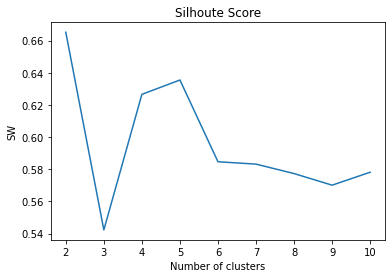

In [56]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

In [71]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.05084745762711865

In [73]:

plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

IndexError: index 1 is out of bounds for axis 1 with size 1